In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite

#database_path = "hawaii.sqlite"
#engine = create_engine(f"sqlite:///{database_path}")



engine = create_engine("sqlite:///hawaii.sqlite")
# reflect an existing database into a new model\
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)
# View all of the classes that automap found
Base.classes.keys()

conn = engine.connect()
hawaii_station = pd.read_sql("SELECT * FROM station", conn)
hawaii_measurement = pd.read_sql("SELECT * FROM measurement WHERE prcp IS NOT NULL", conn)


In [5]:
hawaii_station_list = pd.read_sql("SELECT station FROM station", conn)


In [6]:
check_nan=hawaii_measurement["prcp"].isnull().values.any()
check_nan

False

In [7]:
hawaii_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,6,USC00519397,2010-01-07,0.06,70.0


In [8]:
# reflect an existing database into a new model
Base.classes.keys()

# reflect the tables


['measurement', 'station']

In [9]:
# View all of the classes that automap found


In [10]:
# Save references to each table


In [11]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
hawaii_measurement[["date"]].sort_values(by="date", ascending=[False]).iloc[0]


date    2017-08-23
Name: 18102, dtype: object

In [13]:
display(hawaii_measurement.dtypes)

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [14]:
recent_hawaii_dates_test = pd.read_sql("SELECT * FROM measurement WHERE date >= '2016-23-8' AND prcp IS NOT NULL GROUP BY date", conn)
recent_hawaii_dates_test

,id,station,date,prcp,tobs
0,2495,USC00519397,2017-01-01,0.0,62.0
1,2496,USC00519397,2017-01-02,0.0,66.0
2,2497,USC00519397,2017-01-03,0.0,63.0
3,2498,USC00519397,2017-01-04,0.0,62.0
4,2499,USC00519397,2017-01-05,0.0,63.0
...,...,...,...,...,...
230,2720,USC00519397,2017-08-19,0.0,79.0
231,2721,USC00519397,2017-08-20,0.0,81.0
232,2722,USC00519397,2017-08-21,0.0,81.0
233,2723,USC00519397,2017-08-22,0.0,82.0


In [15]:
recent_hawaii_dates_test = pd.read_sql("SELECT date, sum(prcp) AS prcp FROM measurement WHERE date >= '2016-08-23' AND prcp IS NOT NULL GROUP BY date", conn)
recent_hawaii_dates_test=recent_hawaii_dates_test.sort_values(by=["date"])
recent_hawaii_dates_test

,date,prcp
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.58
364,2017-08-22,0.50


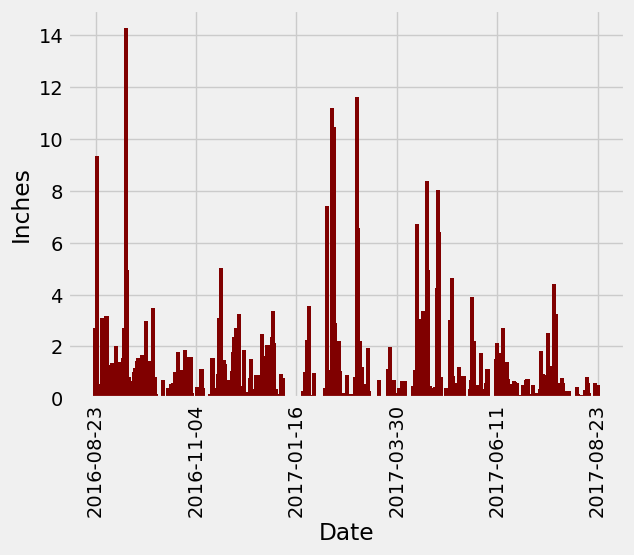

In [16]:
Base.metadata.create_all(engine)
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


y=recent_hawaii_dates_test["prcp"]
x=recent_hawaii_dates_test["date"]
plt.bar(x, y,color = 'maroon',width = 3)
plt.xlabel("Date")
plt.ylabel("Inches")
#recent_hawaii_dates.plot(x,y, rot=90)

plt.xticks(rotation="vertical")
plt.xticks(np.arange(0, 366, 73))
plt.show()


# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
Summary_Data= pd.read_sql("SELECT prcp FROM measurement WHERE date >= '2016-08-23' AND prcp IS NOT NULL", conn)

Summary_Data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
Count= pd.read_sql("SELECT count(DISTINCT station) AS 'stations' FROM measurement", conn)
Count

,stations
0,9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Activity = pd.read_sql("SELECT DISTINCT station, count(station) AS 'activity' FROM measurement GROUP BY station ORDER BY activity DESC", conn)
Activity

,station,activity
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Summary_Station =pd.read_sql("SELECT MAX(tobs) AS max_temp,MIN(tobs) AS min_temp,AVG(tobs) AS average_temp FROM measurement WHERE station= 'USC00519281' ", conn)
Summary_Station

,max_temp,min_temp,average_temp
0,85.0,54.0,71.663781


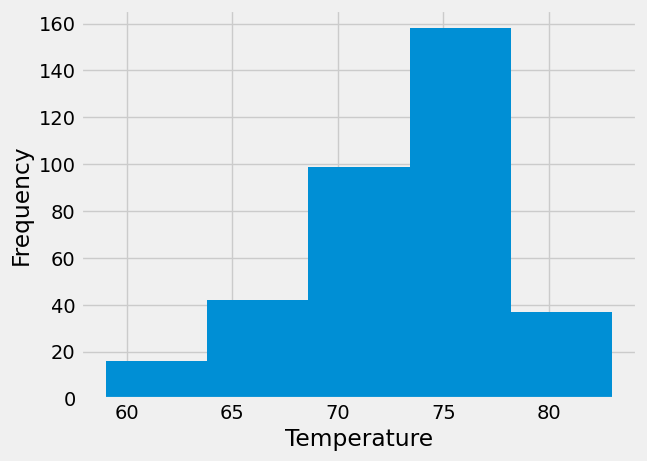

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Active_Station= pd.read_sql("SELECT date, tobs AS temperature FROM measurement WHERE date >= '2016-08-23' AND station ='USC00519281' ", conn)
Active_Station

plt.hist(Active_Station["temperature"], bins=5)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [22]:
# Close Session
session.close()